![alt text](../Bilder/Logo_HS_Mannheim2.png "Logo")

## Gedämpfter Oszillator (GO)

### Die Bewegungsgeichung

Allgemein haben wir eine Bewegungsgleichung zu lösen:    

\begin{aligned}
m\frac{d^2x}{dt^2}=−kx−\beta\frac{dx}{dt} 
\end{aligned}

Wir berücksichtigen, dass im Fall $\beta$=0 (ungedämpfe Schwingungen) $\omega_0=\sqrt{\frac{k}{m}}$ gilt. Weiterhin setzen wir $\frac{\beta}{2m}=\delta$: 

\begin{aligned}
\frac{d^2x}{dt^2}+\omega_0^2 x + 2 \delta \frac{dx}{dt} = 0 
\end{aligned}


In [1]:
# wie immer: 
import matplotlib.pyplot as plt 

# numpy importieren
import numpy as np

# sympy importieren
import sympy as sy

### Lösung der Bewegungsgleichung

Wir nehmen den gleichen Lösungsweg wie beim [harmonischen Oszillator](Bsp2_HarmonischerOszillator.ipynb)

In [2]:
# Symbole definieren
t = sy.symbols('t', real=True)
w0, d = sy.symbols('\\omega_0 \\delta', real=True, positive=True)

# Funktion X_GO definieren
X_GO = sy.Function('X_GO')

# Bewegungsgleichung definieren
Gleichung_GO = sy.diff(X_GO(t), t, 2) + w0**2*X_GO(t) + 2*d*sy.diff(X_GO(t), t)

# Bewegungsgleichung mit 'dsolve' lösen
x_los_GO=sy.dsolve(Gleichung_GO) #x_los_GO: Lösung

x_los_GO

Eq(X_GO(t), C1*exp(t*(-\delta + sqrt(\delta - \omega_0)*sqrt(\delta + \omega_0))) + C2*exp(-t*(\delta + sqrt(\delta - \omega_0)*sqrt(\delta + \omega_0))))

In der Lösung, ähnlich wie beim harmonischen Oszillator, kommen zwei Konstanten $C_1$ und $C_2$ vor.     
Diese bestimmen wir anhand der Anfangsbedingungen: des Ortes $x_0$ und der Geschwidigkeit $v_0$ zur Zeit $t\,= \,0$: 

In [3]:
# Symbole x0, v0 für Anfangsort und Anfangsgeschwindigkeit definieren 
x0, v0 = sy.symbols('x0 v0',real=True)

# Gleichungssystem definieren
equations = [
    sy.Eq(x_los_GO.rhs.subs(t,0).evalf(), x0),# t->0 ersetzen in der rhs (right-hand-side), rechten Seite der Lösung 
    sy.Eq(sy.diff(x_los_GO.rhs,t).subs(t,0).evalf(), v0 )
]

#Gleichungssystem nach 'C1' und 'C2' lösen lassen
Konstanten_GO=sy.solve(equations, 'C1', 'C2')

# Konstanten in der x_los_GO Lösung einsetzen
#x_los_GO_full=x_los_GO.subs(Konstanten_GO).evalf() #x_los_GO_full: vollständige Lösung

# bei binder muss noch [0] das erste Element der Konstanten dazu geschrieben Werden
x_los_GO_full=x_los_GO.subs(Konstanten_GO[0]).evalf() #x_los_GO_full: vollständige Lösung

x_los_GO_full

Eq(X_GO(t), (-0.5*\delta*x0/((\delta - \omega_0)**0.5*(\delta + \omega_0)**0.5) - 0.5*v0/((\delta - \omega_0)**0.5*(\delta + \omega_0)**0.5) + 0.5*x0)*exp(-t*(\delta + sqrt(\delta - \omega_0)*sqrt(\delta + \omega_0))) + (0.5*\delta*x0/((\delta - \omega_0)**0.5*(\delta + \omega_0)**0.5) + 0.5*v0/((\delta - \omega_0)**0.5*(\delta + \omega_0)**0.5) + 0.5*x0)*exp(t*(-\delta + sqrt(\delta - \omega_0)*sqrt(\delta + \omega_0))))

### Startbedingungen




In [4]:
v0_GO=0     # v0: Geschwindigkeit am Anfang
x0_GO=10    # x0: Ort an Anfang

### Systemparameter


In [5]:
omega_GO=20     # Kreisfrequenz ungedämpfte Schwingung
d0=50           # Dämpfungsterm: delta in der Bewegungsgleichung oben   

Realteil der Lösung nehmen,    
Symbole $\omega_0$, $\delta$, $v_0$, $x_0$ durch Zahlen ersetzen: 

In [6]:
x_GO_t=sy.re(x_los_GO_full.rhs).subs({w0: omega_GO, d: d0, v0: v0_GO, x0: x0_GO}).evalf()

### Zeitskala

In [7]:
tt_GO=np.linspace(0,2,400)

Zeit Symbol durch die Zeitskala ersetzen

In [8]:
# Ort
x_GO_tt=[x_GO_t.subs({t: tn}).evalf() for tn in tt_GO]# Symbol t durch Werte aus dem Zeitbereich tt_GO ersetzen
# Geschwindigkeit 
v_GO_tt=[sy.diff(x_GO_t,t).subs({t: tn}).evalf() for tn in tt_GO]
# Beschlenigung 
a_GO_tt=[sy.diff(x_GO_t,t,2).subs({t: tn}).evalf() for tn in tt_GO]

### Graphische Darstellung der Lösung

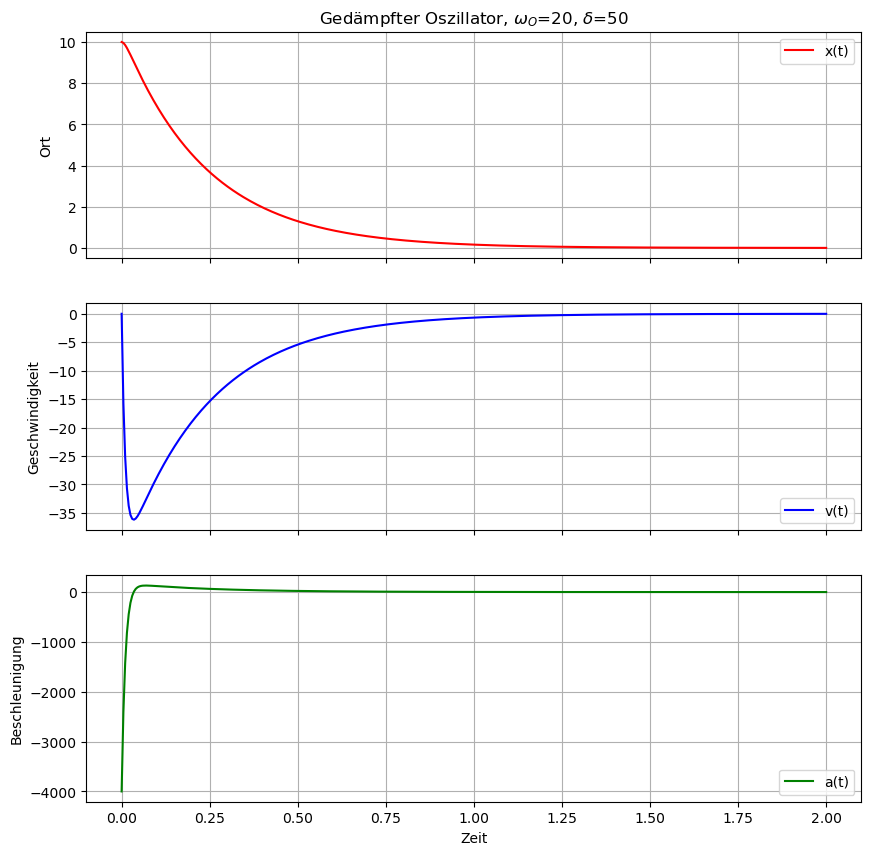

In [9]:
#plt.figure() # neues Fenster, IMMER ein mal für eine neue interaktive Grafik 

f,ax=plt.subplots(3,1,figsize=(10,10), sharex='col')

# Ort
ax[0].plot(tt_GO, x_GO_tt, 'r',label='x(t)') 
ax[0].set_title('Gedämpfter Oszillator, ' +'$\\omega_O$=' + str(omega_GO) + ', ' + '$\\delta$=' + str(d0) )#Titel   
ax[0].legend();               # fügt die Legende ein
ax[0].set_ylabel('Ort')       # fügt y-Achsenbeschriftung ein  
ax[0].grid()             

# Geschwindigkeit
ax[1].plot(tt_GO, v_GO_tt, 'b',label='v(t)') 
ax[1].legend();                     # fügt die Legende ein
ax[1].set_ylabel('Geschwindigkeit') # fügt y-Achsenbeschriftung ein  
ax[1].grid() 

# Beschleunigung
ax[2].plot(tt_GO, a_GO_tt, 'g',label='a(t)') 
ax[2].legend()                     # fügt die Legende ein
ax[2].set_ylabel('Beschleunigung') # fügt y-Achsenbeschriftung ein
ax[2].grid() 

ax[2].set_xlabel('Zeit');          # fügt x-Achsenbeschriftung ein